<a href="https://colab.research.google.com/github/VincentNFR/openclassrooms_p06/blob/data_augmentation/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import numpy as np
image_set = np.load('/content/drive/MyDrive/Colab Notebooks/OpenClassRooms/6/data/images.npy',allow_pickle=True)
label_set = np.load('/content/drive/MyDrive/Colab Notebooks/OpenClassRooms/6/data/labels.npy',allow_pickle=True)
print('dataset loaded')

dataset loaded


In [14]:
image_set.shape, label_set.shape

((3636,), (3636,))

In [18]:
label_example, image_example = label_set[0], image_set[0]

# Image de référence

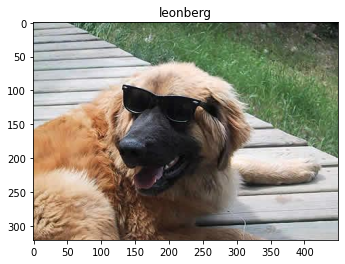

In [19]:
import matplotlib.pyplot as plt
plt.figure()
plt.title(label_example)
plt.imshow(image_example)
plt.show()

In [20]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# Rotation

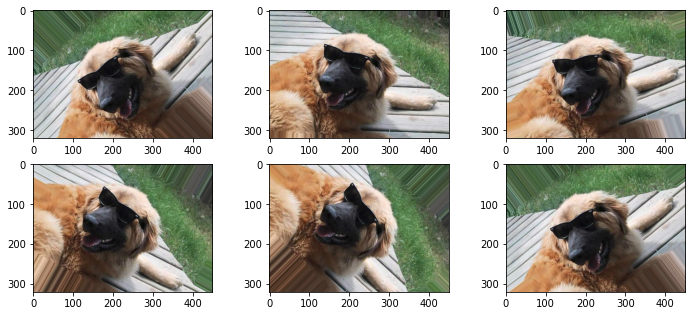

In [31]:
samples = expand_dims(image_example, 0)

datagen = ImageDataGenerator(rotation_range=45)

it = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(12,8), facecolor='white')
for i in range(6):
	# preparing the subplot
	plt.subplot(330 + 1 + i)
	# generating images in batches
	batch = it.next()
	# Remember to convert these images to unsigned integers for viewing 
	image = batch[0].astype('uint8')
	# Plotting the data
	plt.imshow(image)
# Displaying the figure
plt.show()

# Shifting

## Shifting horizontal

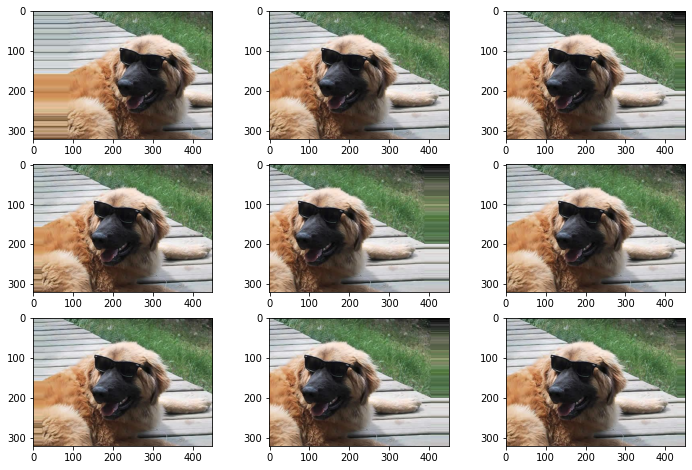

In [30]:
samples = expand_dims(image_example, 0)

datagen = ImageDataGenerator(width_shift_range=0.2)

it = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(12,8), facecolor='white')
for i in range(9):
	# preparing the subplot
	plt.subplot(330 + 1 + i)
	# generating images in batches
	batch = it.next()
	# Remember to convert these images to unsigned integers for viewing 
	image = batch[0].astype('uint8')
	# Plotting the data
	plt.imshow(image)
# Displaying the figure
plt.show()

## Shifting vertical

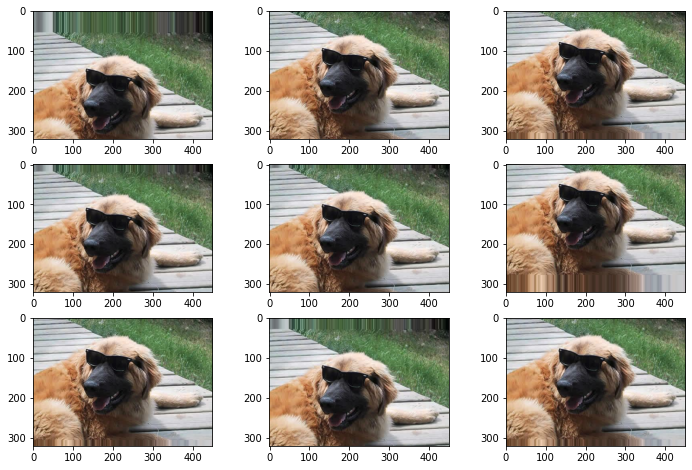

In [32]:
samples = expand_dims(image_example, 0)

datagen = ImageDataGenerator(height_shift_range=0.2)

it = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(12,8), facecolor='white')
for i in range(9):
	# preparing the subplot
	plt.subplot(330 + 1 + i)
	# generating images in batches
	batch = it.next()
	# Remember to convert these images to unsigned integers for viewing 
	image = batch[0].astype('uint8')
	# Plotting the data
	plt.imshow(image)
# Displaying the figure
plt.show()


# Random Flips

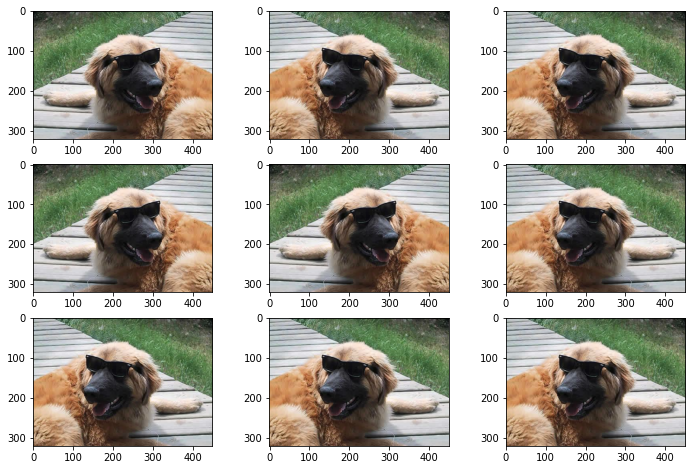

In [34]:
samples = expand_dims(image_example, 0)

datagen = ImageDataGenerator(horizontal_flip=True)

it = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(12,8), facecolor='white')
for i in range(9):
	# preparing the subplot
	plt.subplot(330 + 1 + i)
	# generating images in batches
	batch = it.next()
	# Remember to convert these images to unsigned integers for viewing 
	image = batch[0].astype('uint8')
	# Plotting the data
	plt.imshow(image)
# Displaying the figure
plt.show()


# Brightness

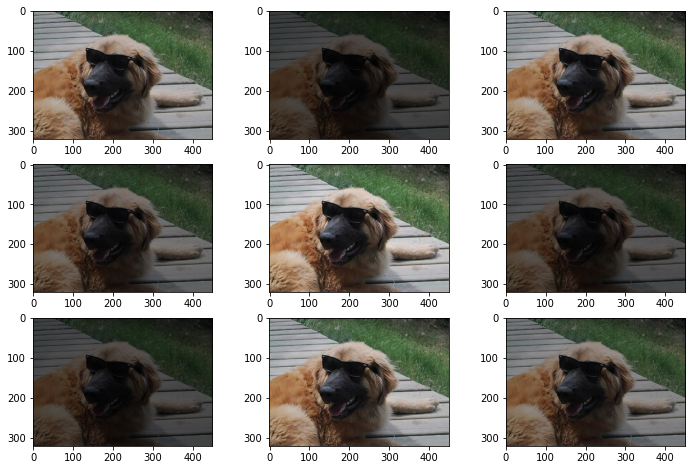

In [40]:
samples = expand_dims(image_example, 0)

datagen = ImageDataGenerator(brightness_range=[0.2, 1.0])

it = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(12,8), facecolor='white')
for i in range(9):
	# preparing the subplot
	plt.subplot(330 + 1 + i)
	# generating images in batches
	batch = it.next()
	# Remember to convert these images to unsigned integers for viewing 
	image = batch[0].astype('uint8')
	# Plotting the data
	plt.imshow(image)
# Displaying the figure
plt.show()

# Zoom

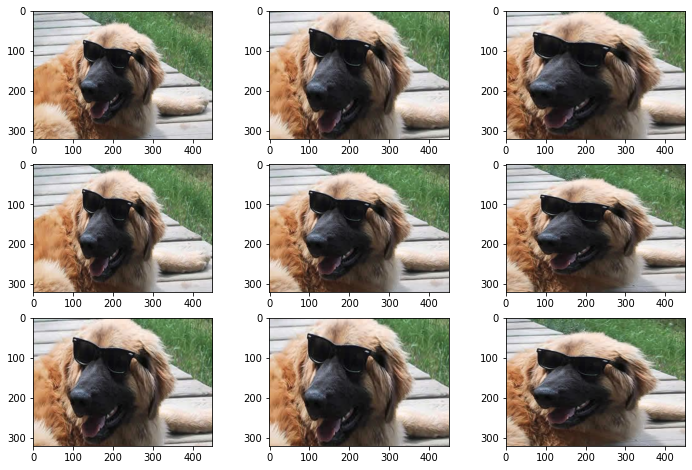

In [44]:
samples = expand_dims(image_example, 0)

datagen = ImageDataGenerator(zoom_range=[0.5, 1.0])

it = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(12,8), facecolor='white')
for i in range(9):
	# preparing the subplot
	plt.subplot(330 + 1 + i)
	# generating images in batches
	batch = it.next()
	# Remember to convert these images to unsigned integers for viewing 
	image = batch[0]
	# Plotting the data
	plt.imshow(image)
# Displaying the figure
plt.show()

Afin d'étoffer le dataset, on va rajouter des image.

In [46]:
print(label_set)

['leonberg' 'afghan_hound' 'samoyed' ... 'saluki' 'irish_wolfhound'
 'scottish_deerhound']


In [165]:
type(label_set[0])

numpy.str_

In [170]:
test_label_set = label_set
test_image_set = image_set

In [58]:
label_unique, count = np.unique(label_set, return_counts=True)
# display the returned array
print("Unique values:", label_unique)
# display the counts
print("Counts:", count)

Unique values: ['afghan_hound' 'airedale' 'basenji' 'bernese_mountain_dog' 'entlebucher'
 'great_pyrenees' 'irish_wolfhound' 'leonberg' 'maltese_dog' 'pomeranian'
 'pug' 'saluki' 'samoyed' 'scottish_deerhound' 'sealyham_terrier'
 'shih tzu' 'tibetan_terrier']
Counts: [238 202 206 217 197 213 218 210 251 219 200 200 217 230 198 214 206]


# fonction qui crée une image aléatoire

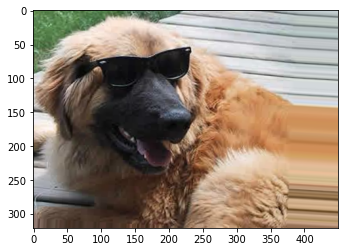

In [148]:
image_generator = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
    )

def generate_new_image(image, seed=1):
    it = image_generator.flow(expand_dims(image, 0), batch_size=1, seed=seed).next()[0].astype('uint8')
    return it

im = generate_new_image(image_example)
plt.imshow(im)
plt.show()

In [171]:
from tqdm.notebook import trange, tqdm
from time import sleep

n_image_per_class = 255
# image_set
# label_set

np.random.seed(1)

for i in trange(len(label_unique), desc='Total set'):
    breed = label_unique[i]
    n_image_to_create = n_image_per_class - count[i]
    samples = np.where(label_set==breed)[0]
    for j in tqdm(range(n_image_to_create), desc=breed):
        sample_image = image_set[np.random.choice(samples)]
        new_image = generate_new_image(sample_image)
        test_label_set = np.append(test_label_set, breed)
        test_image_set = np.append(test_image_set, new_image)

Total set:   0%|          | 0/17 [00:00<?, ?it/s]

afghan_hound:   0%|          | 0/17 [00:00<?, ?it/s]

airedale:   0%|          | 0/53 [00:00<?, ?it/s]

basenji:   0%|          | 0/49 [00:00<?, ?it/s]

bernese_mountain_dog:   0%|          | 0/38 [00:00<?, ?it/s]

entlebucher:   0%|          | 0/58 [00:00<?, ?it/s]

great_pyrenees:   0%|          | 0/42 [00:00<?, ?it/s]

irish_wolfhound:   0%|          | 0/37 [00:00<?, ?it/s]

leonberg:   0%|          | 0/45 [00:00<?, ?it/s]

maltese_dog:   0%|          | 0/4 [00:00<?, ?it/s]

pomeranian:   0%|          | 0/36 [00:00<?, ?it/s]

pug:   0%|          | 0/55 [00:00<?, ?it/s]

saluki:   0%|          | 0/55 [00:00<?, ?it/s]

samoyed:   0%|          | 0/38 [00:00<?, ?it/s]

scottish_deerhound:   0%|          | 0/25 [00:00<?, ?it/s]

sealyham_terrier:   0%|          | 0/57 [00:00<?, ?it/s]

shih tzu:   0%|          | 0/41 [00:00<?, ?it/s]

tibetan_terrier:   0%|          | 0/49 [00:00<?, ?it/s]

In [172]:
label_set.shape, test_label_set.shape

((3636,), (4335,))

In [173]:
image_set.shape, test_image_set.shape

((3636,), (408514686,))

In [ ]:
def normalise_input(x):
    return x/255.

In [ ]:
# pre-process the data for Keras
image_tensor = normalise_input(test_image_set)
label_tensor = test_label_set

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/OpenClassRooms/6/data/image_tensor.npy', image_tensor)
np.save('/content/drive/MyDrive/Colab Notebooks/OpenClassRooms/6/data/label_tensor.npy', label_tensor)

print('data saved.')